<a href="https://colab.research.google.com/github/agterzis/Machine-Learning/blob/main/%CE%9C%CE%B7%CF%87%CE%B1%CE%BD%CE%B9%CE%BA%CE%AE_%CE%9C%CE%AC%CE%B8%CE%B7%CF%83%CE%B7_%CE%95%CF%81%CE%B3%CE%B1%CF%83%CE%AF%CE%B1_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update -qq
!apt-get install -y -qq swig


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package swig4.0.
(Reading database ... 121689 files and directories currently installed.)
Preparing to unpack .../swig4.0_4.0.2-1ubuntu1_amd64.deb ...
Unpacking swig4.0 (4.0.2-1ubuntu1) ...
Selecting previously unselected package swig.
Preparing to unpack .../swig_4.0.2-1ubuntu1_all.deb ...
Unpacking swig (4.0.2-1ubuntu1) ...
Setting up swig4.0 (4.0.2-1ubuntu1) ...
Setting up swig (4.0.2-1ubuntu1) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
!pip -q install "gymnasium[box2d]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 31.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 106.8 MB/s eta 0:00:00


In [ ]:
!pip -q install renderlab


In [ ]:
!pip -q install "stable-baselines3[extra]"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 14.0 MB/s eta 0:00:00


## (2) Συναρτήσεις `reset()`, `step()` και `render()` (Gymnasium)

Στα environments του Gymnasium το επεισόδιο τρέχει πάντα με τον ίδιο τρόπο:

### `reset()`
Χρησιμοποιείται στην αρχή κάθε επεισοδίου για να ξεκινήσει το περιβάλλον από την αρχή.
Μας επιστρέφει:
- την αρχική παρατήρηση (state/observation)
- ένα `info` λεξικό με επιπλέον πληροφορίες (αν χρειάζεται)


In [ ]:
import gymnasium as gym
import renderlab as rl

env = gym.make("LunarLander-v3", render_mode="rgb_array")
env = rl.RenderFrame(env, "./output_random")

obs, info = env.reset(seed=0)

done = False
while not done:
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated

env.play()


/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
  if event.key is 'enter':



Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



t:  75%|███████▌  | 45/60 [00:00<00:00, 449.65it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file ./output_random/1767988912.8375456.mp4, 720000 bytes wanted but 0 bytes read,at frame 59/60, at time 1.97/1.97 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


In [ ]:
import numpy as np
import gymnasium as gym

def eval_random_agent(env_id="LunarLander-v3", n_episodes=5, seed=0):
    env = gym.make(env_id)
    scores = []

    for ep in range(n_episodes):
        obs, info = env.reset(seed=seed + ep)
        done = False
        ep_return = 0.0

        while not done:
            action = env.action_space.sample()
            obs, reward, terminated, truncated, info = env.step(action)
            ep_return += reward
            done = terminated or truncated

        scores.append(ep_return)

    env.close()
    return np.array(scores)

scores = eval_random_agent(n_episodes=5)
print("Episode returns:", scores)
print("Mean return:", scores.mean())
print("Std:", scores.std())


Episode returns: [ -74.78192441 -103.84918241  -60.37797641 -145.93973663 -214.77749157]
Mean return: -119.94526228686996
Std: 55.70625966300224


  return datetime.utcnow().replace(tzinfo=utc)

Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
  return datetime.utcnow().replace(tzinfo=utc)

  warnings.warn(



DQN train_time_sec= 233.3664746284485 eval_mean(5 eps)= -113.03397439999999 eval_std= 22.052674336373695
PPO train_time_sec= 412.93680691719055 eval_mean(5 eps)= 50.8026912 eval_std= 94.51251752835216


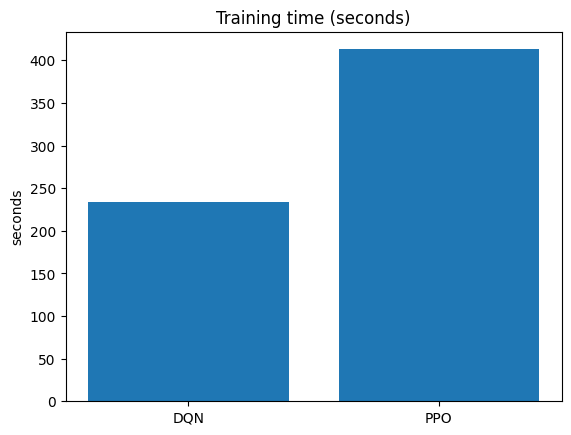

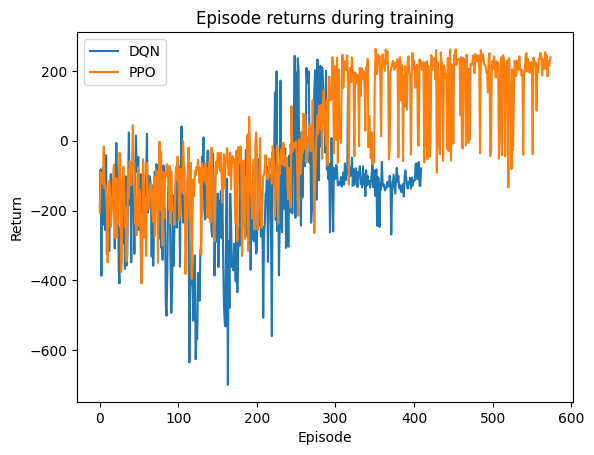

In [ ]:
import time
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

from stable_baselines3 import DQN, PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.evaluation import evaluate_policy

TOTAL_TIMESTEPS = 200_000

class EpisodeReturnLogger(BaseCallback):
    def __init__(self):
        super().__init__()
        self.episode_returns = []
        self.episode_lengths = []

    def _on_step(self) -> bool:
        infos = self.locals.get("infos", [])
        for info in infos:
            if "episode" in info:
                self.episode_returns.append(info["episode"]["r"])
                self.episode_lengths.append(info["episode"]["l"])
        return True

def make_env(env_id="LunarLander-v3", seed=0):
    env = gym.make(env_id)
    env = Monitor(env)
    env.reset(seed=seed)
    return env

def train_and_eval(algo_name, total_timesteps=TOTAL_TIMESTEPS, seed=0):
    env = make_env(seed=seed)
    callback = EpisodeReturnLogger()

    if algo_name == "DQN":
        model = DQN(
            "MlpPolicy",
            env,
            verbose=0,
            seed=seed,
            buffer_size=100_000,
            learning_starts=10_000,
            batch_size=64,
            tau=1.0,
            gamma=0.99,
            train_freq=4,
            target_update_interval=10_000,
            exploration_fraction=0.1,
            exploration_final_eps=0.02,
        )
    elif algo_name == "PPO":
        model = PPO(
            "MlpPolicy",
            env,
            verbose=0,
            seed=seed,
            n_steps=2048,
            batch_size=64,
            gamma=0.99,
            gae_lambda=0.95,
            ent_coef=0.0,
            learning_rate=3e-4,
            clip_range=0.2,
        )
    else:
        raise ValueError("Unknown algo")

    t0 = time.time()
    model.learn(total_timesteps=total_timesteps, callback=callback)
    train_time = time.time() - t0

    eval_env = make_env(seed=seed + 123)
    mean_reward, std_reward = evaluate_policy(model, eval_env, n_eval_episodes=5, deterministic=True)

    env.close()
    eval_env.close()

    return {
        "model": model,
        "train_time": train_time,
        "train_episode_returns": np.array(callback.episode_returns, dtype=float),
        "train_episode_lengths": np.array(callback.episode_lengths, dtype=int),
        "eval_mean": float(mean_reward),
        "eval_std": float(std_reward),
    }

results = {}
for algo in ["DQN", "PPO"]:
    results[algo] = train_and_eval(algo)
    print(algo, "train_time_sec=", results[algo]["train_time"],
          "eval_mean(5 eps)=", results[algo]["eval_mean"],
          "eval_std=", results[algo]["eval_std"])

algos = list(results.keys())
times = [results[a]["train_time"] for a in algos]

plt.figure()
plt.bar(algos, times)
plt.title("Training time (seconds)")
plt.ylabel("seconds")
plt.show()

plt.figure()
for a in algos:
    rets = results[a]["train_episode_returns"]
    plt.plot(rets, label=a)
plt.title("Episode returns during training")
plt.xlabel("Episode")
plt.ylabel("Return")
plt.legend()
plt.show()


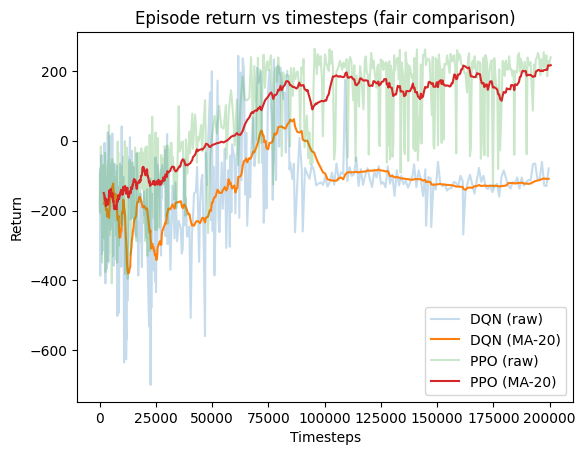

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def moving_average(x, w=20):
    if len(x) < w:
        return x
    return np.convolve(x, np.ones(w)/w, mode="valid")

plt.figure()

for algo in ["DQN", "PPO"]:
    rets = results[algo]["train_episode_returns"]
    lens = results[algo]["train_episode_lengths"]
    t = np.cumsum(lens)
    plt.plot(t, rets, alpha=0.25, label=f"{algo} (raw)")

    ma = moving_average(rets, w=20)
    t_ma = t[len(t)-len(ma):]
    plt.plot(t_ma, ma, label=f"{algo} (MA-20)")

plt.title("Episode return vs timesteps (fair comparison)")
plt.xlabel("Timesteps")
plt.ylabel("Return")
plt.legend()
plt.show()


In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy
import gymnasium as gym
from stable_baselines3.common.monitor import Monitor

def make_eval_env(seed=0):
    env = Monitor(gym.make("LunarLander-v3"))
    env.reset(seed=seed)
    return env

for algo in ["DQN", "PPO"]:
    eval_env = make_eval_env(seed=123)
    m5, s5 = evaluate_policy(results[algo]["model"], eval_env, n_eval_episodes=5, deterministic=True)
    eval_env.close()

    eval_env = make_eval_env(seed=123)
    m20, s20 = evaluate_policy(results[algo]["model"], eval_env, n_eval_episodes=20, deterministic=True)
    eval_env.close()

    print(algo, "eval(5):", m5, s5, " | eval(20):", m20, s20)


DQN eval(5): -113.03397439999999 22.052674336373695  | eval(20): -114.41374645 19.462202863979183
PPO eval(5): 50.8026912 94.51251752835216  | eval(20): 123.22503624999999 104.98586010215372


In [ ]:
!pip -q install rl_zoo3 pyyaml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.0/78.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 9.0 MB/s eta 0:00:00


In [ ]:
import yaml
from pathlib import Path
import rl_zoo3

def load_rlzoo_hyperparams(algo: str, env_id: str):
    pkg_path = Path(rl_zoo3.__file__).resolve().parent
    yml_path = pkg_path / "hyperparams" / f"{algo}.yml"
    if not yml_path.exists():
        raise FileNotFoundError(f"Δεν βρέθηκε: {yml_path}")

    with open(yml_path, "r", encoding="utf-8") as f:
        data = yaml.safe_load(f)

    if env_id not in data:
        raise KeyError(f"Δεν βρέθηκε env_id={env_id} στο {yml_path.name}. Διαθέσιμα keys: {list(data.keys())[:20]} ...")

    return data[env_id], str(yml_path)

ppo_hp, ppo_src = load_rlzoo_hyperparams("ppo", "LunarLander-v3")
dqn_hp, dqn_src = load_rlzoo_hyperparams("dqn", "LunarLander-v3")

print("PPO hyperparams source:", ppo_src)
print(ppo_hp)
print("\nDQN hyperparams source:", dqn_src)
print(dqn_hp)


  return datetime.utcnow().replace(tzinfo=utc)



PPO hyperparams source: /usr/local/lib/python3.12/dist-packages/rl_zoo3/hyperparams/ppo.yml
{'n_envs': 16, 'n_timesteps': 1000000.0, 'policy': 'MlpPolicy', 'n_steps': 1024, 'batch_size': 64, 'gae_lambda': 0.98, 'gamma': 0.999, 'n_epochs': 4, 'ent_coef': 0.01}

DQN hyperparams source: /usr/local/lib/python3.12/dist-packages/rl_zoo3/hyperparams/dqn.yml
{'n_timesteps': 100000.0, 'policy': 'MlpPolicy', 'learning_rate': 0.00063, 'batch_size': 128, 'buffer_size': 50000, 'learning_starts': 0, 'gamma': 0.99, 'target_update_interval': 250, 'train_freq': 4, 'gradient_steps': -1, 'exploration_fraction': 0.12, 'exploration_final_eps': 0.1, 'policy_kwargs': 'dict(net_arch=[256, 256])'}


In [ ]:
import ast
import time
import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

from stable_baselines3 import DQN, PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.env_util import make_vec_env


In [ ]:
def sanitize_rlzoo_hyperparams(hp: dict):
    """
    Παίρνει hyperparams από rl_zoo3 YAML και τα κάνει συμβατά με SB3 constructors.
    - αφαιρεί metadata (n_timesteps, n_envs)
    - αφαιρεί policy (θα το περάσουμε εμείς)
    - μετατρέπει policy_kwargs από string -> dict (αν χρειάζεται)
    """
    hp = dict(hp)

    # metadata
    hp.pop("n_timesteps", None)
    hp.pop("n_envs", None)

    hp.pop("policy", None)

    if "policy_kwargs" in hp and isinstance(hp["policy_kwargs"], str):
        s = hp["policy_kwargs"].strip()
        if s.startswith("dict(") and s.endswith(")"):
            inside = s[len("dict("):-1]
            items = {}
            parts = []
            depth = 0
            start = 0
            for i, ch in enumerate(inside):
                if ch in "[({":
                    depth += 1
                elif ch in "])}":
                    depth -= 1
                elif ch == "," and depth == 0:
                    parts.append(inside[start:i].strip())
                    start = i + 1
            parts.append(inside[start:].strip())

            for part in parts:
                if not part:
                    continue
                key, val = part.split("=", 1)
                key = key.strip()
                val = val.strip()
                items[key] = ast.literal_eval(val)

            hp["policy_kwargs"] = items
        else:
            # αν είναι κάτι άλλο, προσπάθησε γενικό literal_eval
            try:
                hp["policy_kwargs"] = ast.literal_eval(s)
            except Exception:
                raise ValueError(f"policy_kwargs είναι string αλλά δεν μπορώ να το κάνω dict: {s}")

    return hp


In [ ]:
class EpisodeReturnLogger(BaseCallback):
    def __init__(self):
        super().__init__()
        self.episode_returns = []
        self.episode_lengths = []

    def _on_step(self) -> bool:
        infos = self.locals.get("infos", [])
        for info in infos:
            if "episode" in info:
                self.episode_returns.append(info["episode"]["r"])
                self.episode_lengths.append(info["episode"]["l"])
        return True

def make_eval_env(seed=0):
    env = Monitor(gym.make("LunarLander-v3"))
    env.reset(seed=seed)
    return env

In [ ]:
def train_tuned(algo_name: str, raw_hp: dict, total_timesteps=None, seed=0):
    callback = EpisodeReturnLogger()

    n_envs = int(raw_hp.get("n_envs", 1))
    env = make_vec_env("LunarLander-v3", n_envs=n_envs, seed=seed)

    hp = sanitize_rlzoo_hyperparams(raw_hp)

    if total_timesteps is None:
        total_timesteps = int(float(raw_hp.get("n_timesteps", 200_000)))

    t0 = time.time()
    if algo_name.upper() == "PPO":
        model = PPO("MlpPolicy", env, seed=seed, verbose=0, **hp)
    elif algo_name.upper() == "DQN":
        model = DQN("MlpPolicy", env, seed=seed, verbose=0, **hp)
    else:
        raise ValueError("algo_name must be 'PPO' or 'DQN'")

    model.learn(total_timesteps=total_timesteps, callback=callback)
    train_time = time.time() - t0

    eval_env = make_eval_env(seed=seed + 123)
    mean5, std5 = evaluate_policy(model, eval_env, n_eval_episodes=5, deterministic=True)
    eval_env.close()

    eval_env = make_eval_env(seed=seed + 123)
    mean20, std20 = evaluate_policy(model, eval_env, n_eval_episodes=20, deterministic=True)
    eval_env.close()

    env.close()

    return {
        "model": model,
        "train_time": train_time,
        "train_episode_returns": np.array(callback.episode_returns, dtype=float),
        "train_episode_lengths": np.array(callback.episode_lengths, dtype=int),
        "eval5_mean": float(mean5),
        "eval5_std": float(std5),
        "eval20_mean": float(mean20),
        "eval20_std": float(std20),
        "hp_used": hp,
        "timesteps": int(total_timesteps),
        "n_envs": int(n_envs)
    }


In [ ]:
tuned_results = {}
tuned_results["DQN_tuned"] = train_tuned("DQN", dqn_hp, total_timesteps=None, seed=0)
tuned_results["PPO_tuned"] = train_tuned("PPO", ppo_hp, total_timesteps=None, seed=0)

for k, v in tuned_results.items():
    print(
        k,
        "| timesteps =", v["timesteps"],
        "| n_envs =", v["n_envs"],
        "| time_sec =", round(v["train_time"], 1),
        "| eval(5) =", (round(v["eval5_mean"], 1), round(v["eval5_std"], 1)),
        "| eval(20) =", (round(v["eval20_mean"], 1), round(v["eval20_std"], 1))
    )


  warnings.warn(



DQN_tuned | timesteps = 100000 | n_envs = 1 | time_sec = 369.4 | eval(5) = (-39.1, 6.2) | eval(20) = (-6.6, 85.6)
PPO_tuned | timesteps = 1000000 | n_envs = 16 | time_sec = 1094.6 | eval(5) = (249.1, 23.5) | eval(20) = (256.3, 16.3)


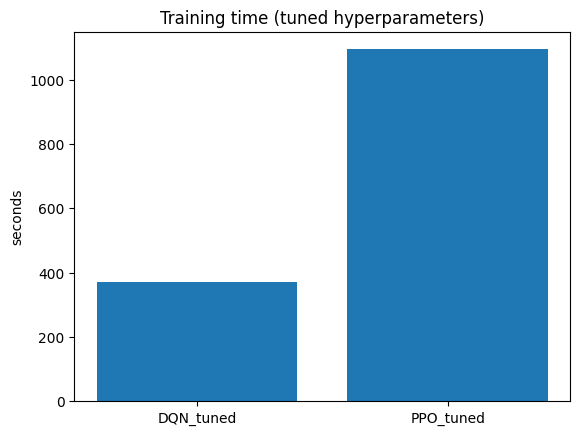

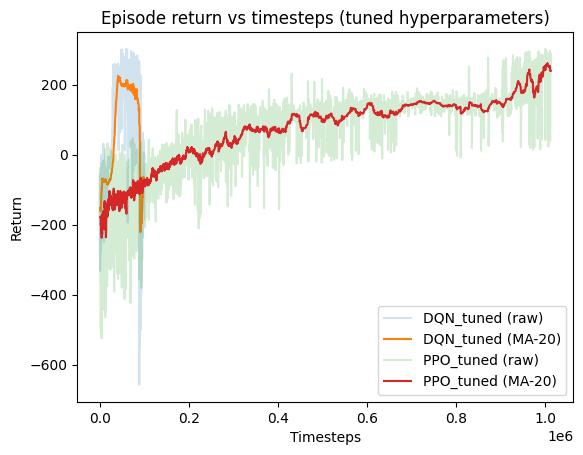

In [ ]:
def moving_average(x, w=20):
    if len(x) < w:
        return x
    return np.convolve(x, np.ones(w)/w, mode="valid")

# Plot 1: training time
plt.figure()
plt.bar(list(tuned_results.keys()), [tuned_results[k]["train_time"] for k in tuned_results.keys()])
plt.title("Training time (tuned hyperparameters)")
plt.ylabel("seconds")
plt.show()

# Plot 2: return vs timesteps
plt.figure()
for k in tuned_results.keys():
    rets = tuned_results[k]["train_episode_returns"]
    lens = tuned_results[k]["train_episode_lengths"]
    t = np.cumsum(lens)

    plt.plot(t, rets, alpha=0.2, label=f"{k} (raw)")
    ma = moving_average(rets, w=20)
    t_ma = t[len(t)-len(ma):]
    plt.plot(t_ma, ma, label=f"{k} (MA-20)")

plt.title("Episode return vs timesteps (tuned hyperparameters)")
plt.xlabel("Timesteps")
plt.ylabel("Return")
plt.legend()
plt.show()


### Συμπέρασμα
Ο random agent προφανώς δεν έχει καλή απόδοση γιατί κινείται τυχαία.
Οι DQN και PPO καταφέρνουν να μάθουν μια στρατηγική και να βελτιώσουν το reward.
Τέλος, με tuned hyperparameters (SB3 Zoo) φαίνεται ότι η εκπαίδευση γίνεται πιο αποτελεσματική και σταθερή.
